In [1]:
import tensorflow as tf ##pip install tensorflow-gpu
import cv2 ### pip install opencv-python
## pip install open cv-contrib-python 
import os
import matplotlib.pyplot as plt ##pip install matplotlib
import numpy as np ##pip install numpy

In [7]:
img_array = cv2.imread("Test_Dataset/Closed_Eyes/s0018_01909_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)

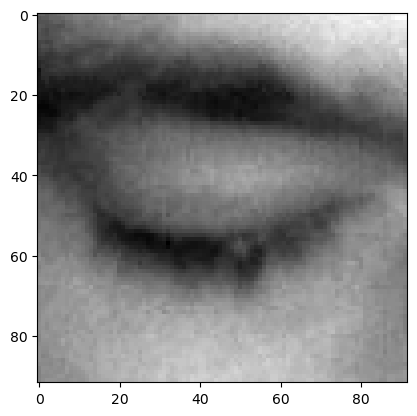

In [9]:
plt.imshow(img_array,cmap="gray")

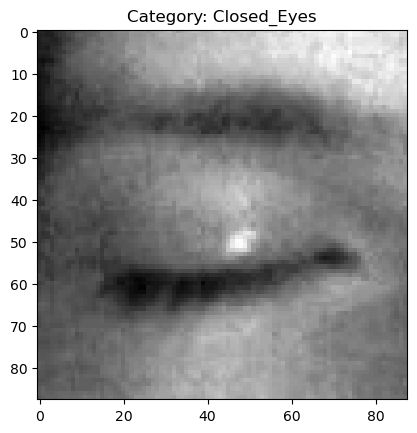

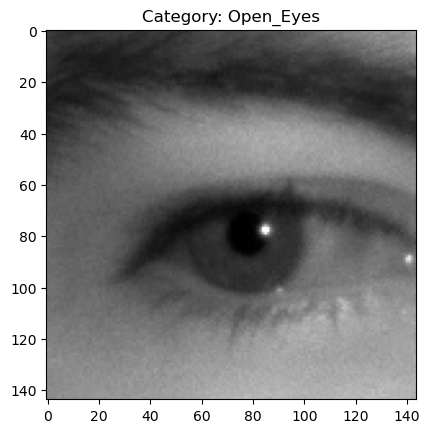

In [11]:
# Base directory and classes
Datadirectory = "Test_Dataset/"
Classes = ["Closed_Eyes", "Open_Eyes"]  # List of categories

# Loop through each class
for category in Classes:
    path = os.path.join(Datadirectory, category)  # Path to each category
    for img in os.listdir(path):
        # Read image in grayscale
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        
        # Convert grayscale image to RGB
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        
        # Display the grayscale image
        plt.imshow(img_array, cmap="gray")
        plt.title(f"Category: {category}")
        plt.show()
        
        # Break after displaying one image
        break

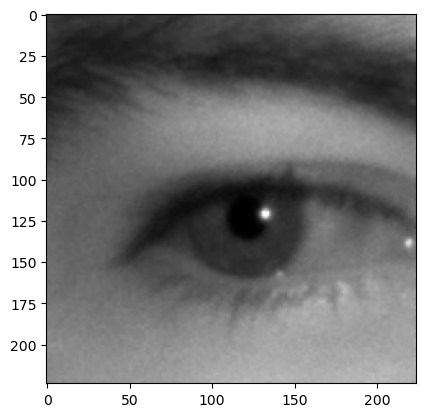

In [13]:
img_size= 224

new_array=cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [15]:
training_Data = []

def create_training_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass


In [17]:
create_training_Data()

In [19]:
print(len(training_Data))

3313


In [21]:
import random

random.shuffle(training_Data)

In [23]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [25]:
X.shape

(3313, 224, 224, 3)

In [27]:
#Normalize X: Scale the pixel values to the range [0, 1] by dividing by 255.0
X = X / 255.0

In [29]:
#Converting y to a NumPy Array
y = np.array(y)

In [31]:
import pickle

# Save X to a file
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Save y to a file
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [33]:
# Load X from the file
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# Load y from the file
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, Model
import tensorflow.keras as keras

In [37]:
# Load MobileNet
# convolutional neural network architecture. pre-trained weights from the ImageNet dataset
model = MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [39]:
# Freeze the layers of the pre-trained model speeds up training, and prevents overfitting
for layer in model.layers:
    layer.trainable = False
    

In [41]:
# Build the new model
base_input = model.input
base_output = model.layers[-4].output
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [43]:
# Create the new model
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [45]:
# Compile the new model
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
# Check the summary of the new model
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 2,226,369 (8.49 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 2,176,192 (8.30 MB)

In [49]:
new_model.fit(X, y, epochs=1, validation_split=0.1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.7119 - loss: 4.7139 - val_accuracy: 0.9608 - val_loss: 0.1679


In [51]:
new_model.fit(X, y, epochs=1, validation_split=0.1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.9874 - loss: 0.0454 - val_accuracy: 0.9910 - val_loss: 0.0297


In [53]:
new_model.fit(X, y, epochs=1, validation_split=0.1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.9950 - loss: 0.0176 - val_accuracy: 0.9970 - val_loss: 0.0377


In [55]:
new_model.fit(X, y, epochs=1, validation_split=0.1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.9955 - loss: 0.0120 - val_accuracy: 0.9970 - val_loss: 0.0315


In [57]:
# Save the model in .h5 format
new_model.save('my_model2.h5')

In [59]:
# Load the model from the saved .h5 file
new_model = tf.keras.models.load_model('my_model2.h5')

In [61]:
img_array = cv2.imread('s0019_00272_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor (img_array, cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [63]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)


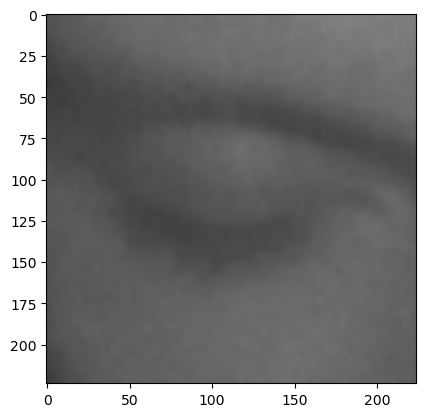

In [65]:
plt.imshow(new_array)

In [67]:
X_input=X_input/255.0

In [69]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [71]:
prediction

array([[0.00019848]], dtype=float32)

In [97]:
img = cv2.imread('different_img.jpg')

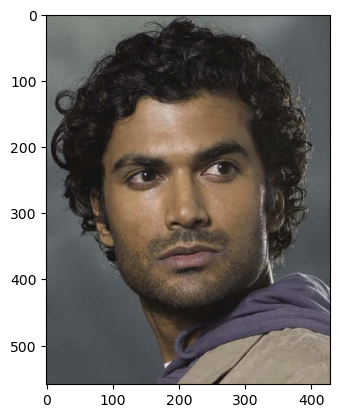

In [99]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [103]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [105]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [107]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [109]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [111]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

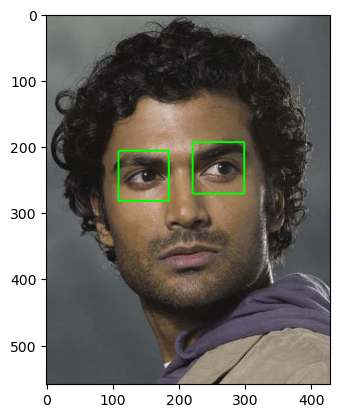

In [113]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [115]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:  # Changed the semicolon to a colon
        print("Eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]


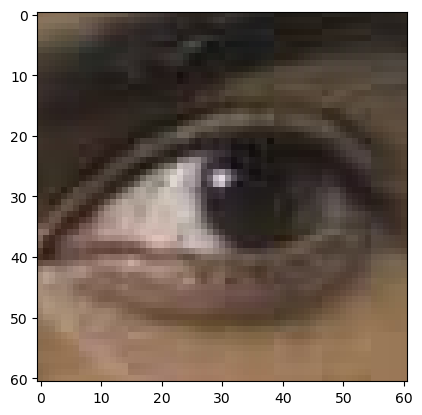

In [117]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [119]:
eyes_roi.shape

(61, 61, 3)

In [121]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255.0

In [123]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)